In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path='ex2data1.txt'
data=pd.read_csv(path,names=['Exam 1','Exam 2','Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


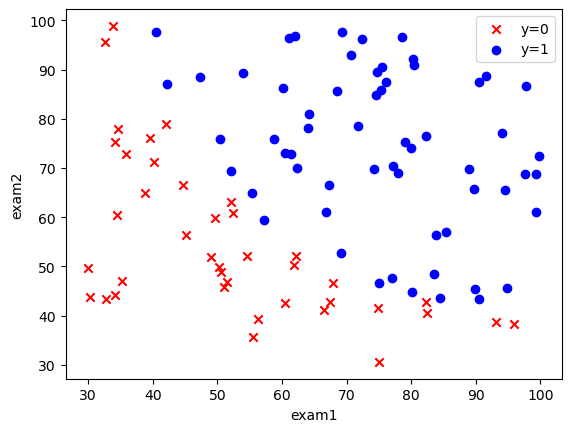

In [5]:
fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='exam1',
      ylabel='exam2')
plt.show()

构造数据集

In [6]:
def get_Xy(data):
    data.insert(0,'ones',1)
    X_=data.iloc[:,0:-1]
    X=X_.values
    
    y_=data.iloc[:,-1]
    y=y_.values.reshape(len(y_),1)
    
    return X,y

In [7]:
X,y=get_Xy(data)

In [8]:
X.shape

(100, 3)

In [9]:
y.shape

(100, 1)

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [11]:
def costFunction(X,y,theta):
    A=sigmoid(X@theta)
    first=-y*np.log(A)
    second=-(1-y)*np.log(1-A)
    
    return np.sum(first+second)/len(X)

In [12]:
theta=np.zeros((3,1))
theta.shape

(3, 1)

In [13]:
cost_init=costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [14]:
def gradientDescent(X,y,theta,iters,alpha):
    m=len(X)
    costs = []
    
    for i in range(iters):
        A=sigmoid(X@theta)
        theta = theta - (alpha/m)*X.T@(A-y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 10000 == 0:
            print(cost)
            
    return costs,theta

In [15]:
alpha=0.004
iters=200000

In [16]:
costs,theta_final=gradientDescent(X,y,theta,iters,alpha)

1.9886538578930084
2.706676380747814
5.159653459570274
1.3288041261254444
1.652586574603404
3.7379122586603324
1.0707715728766347
0.30085687331363575
0.5849740396161554
0.8746137092710174
1.1026863099626751
0.9506321903863946
0.8128522177396158
0.6927778713327548
0.5900152379936091
0.5025762118842436
0.42890975437652046
0.36834275550087214
0.32053967884088685
0.28460229018559496


In [17]:
theta_final

array([[-23.77314018],
       [  0.18687162],
       [  0.18041411]])

In [20]:
def predict(X,theta):
    prob=sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [22]:
y_=np.array(predict(X,theta_final))
y_pre=y_.reshape(len(y_),1)

acc=np.mean(y_pre==y)

print(acc)

0.86


In [23]:
coef1=-theta_final[0,0]/theta_final[2,0]
coef2=-theta_final[1,0]/theta_final[2,0]

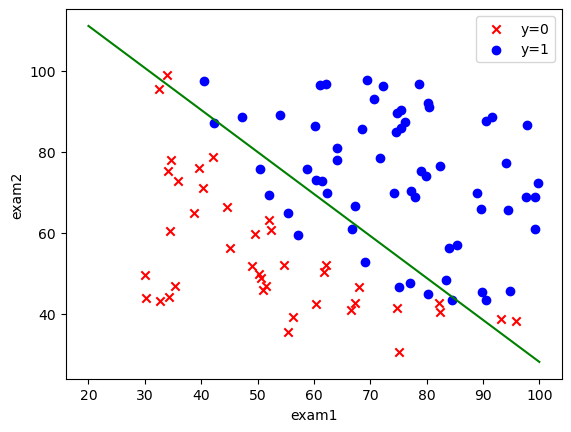

In [25]:
x=np.linspace(20,100,100)
f=coef1+coef2*x

fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()

ax.set(xlabel='exam1',
      ylabel='exam2')

ax.plot(x,f,c='g')
plt.show()